 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whalepath = Path("Resources/whale_returns.csv")

In [3]:
# Set the `date` column as a datetime index to the DataFrame
whale_df = pd.read_csv(whalepath, index_col="Date",infer_datetime_format=True,parse_dates=True)

# Preview Data
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
# Cleaning nulls from DataFrame by dropping
whale_df = whale_df.dropna()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algopath = Path("Resources/algo_returns.csv")

In [8]:
# Set the `date` column as a datetime index to the DataFrame
algo_df = pd.read_csv(algopath, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Preview Data
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500path = Path("Resources/sp500_history.csv")

In [13]:
# Set the `date` column as a datetime index to the DataFrame
sp500_df = pd.read_csv(sp500path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [14]:
# Preview Data
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [15]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [16]:
# Fix Data Types
# Clean identified numeric fields with $ symbol and convert `Close` from `object` to `float`
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].str.replace(",", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.sort_index(inplace = True)
sp500_df

C:\Users\dspin\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [17]:
# Recheck Data Types
sp500_df.dtypes

Close    float64
dtype: object

In [18]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [19]:
# Drop nulls
sp500_df = sp500_df.dropna()
sp500_df

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [20]:
# Recheck for Nulls
sp500_df.isnull().sum()

Close    0
dtype: int64

In [21]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.rename(columns={'Close': 'S&P 500'}, inplace=True)

In [22]:
sp500_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'All Portfolio Returns'}, xlabel='Date'>

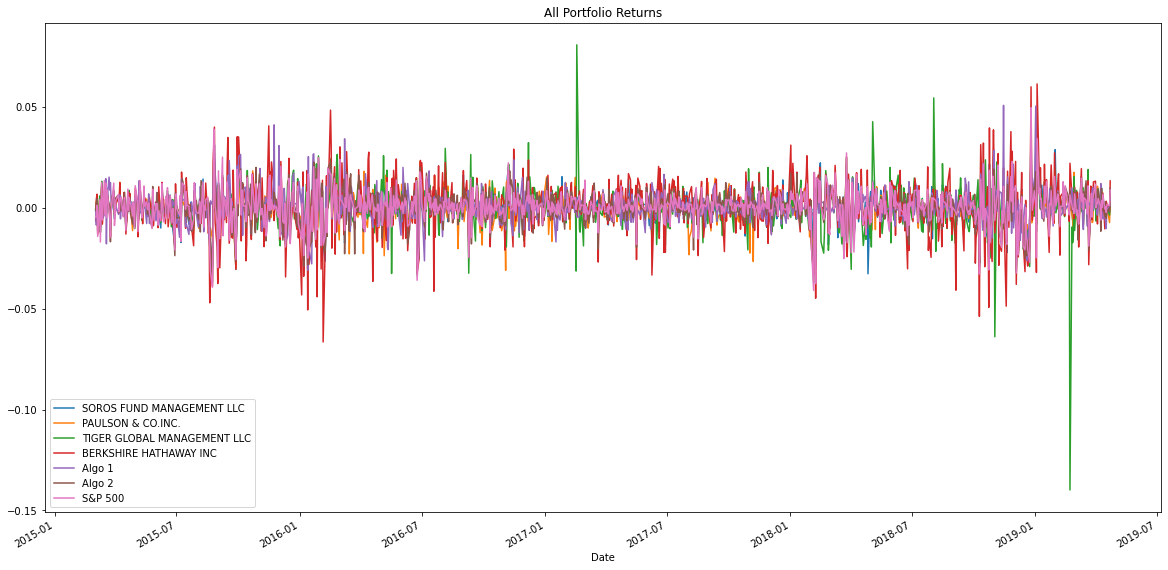

In [24]:
# Plot daily returns of all portfolios
combined_df.plot(title='All Portfolio Returns',figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

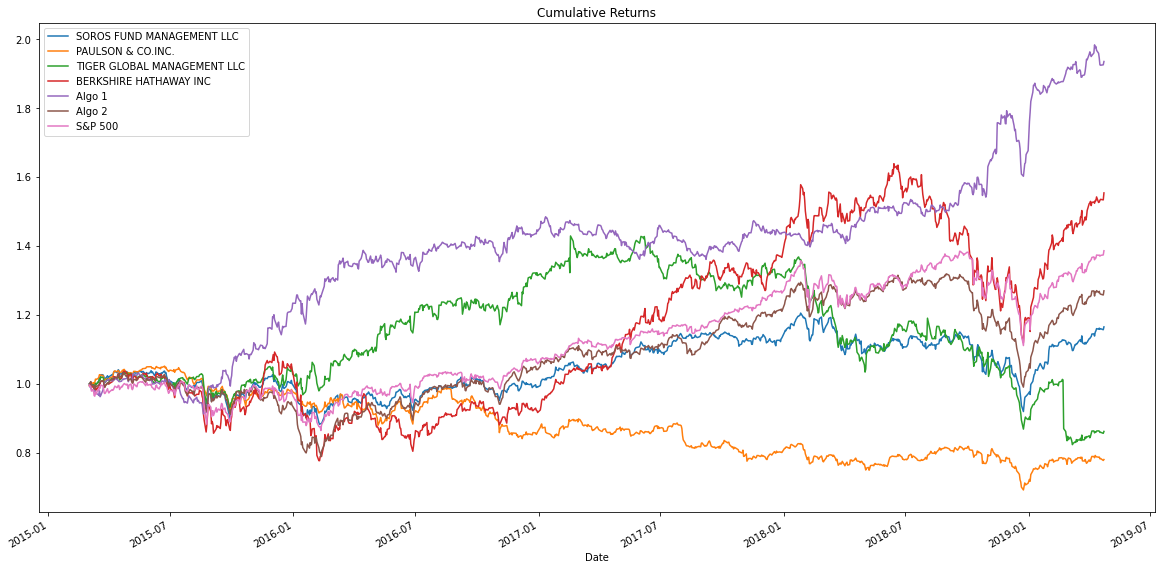

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# print(cumulative_returns.tail())

# Plot cumulative returns
cumulative_returns.plot(title = 'Cumulative Returns', figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

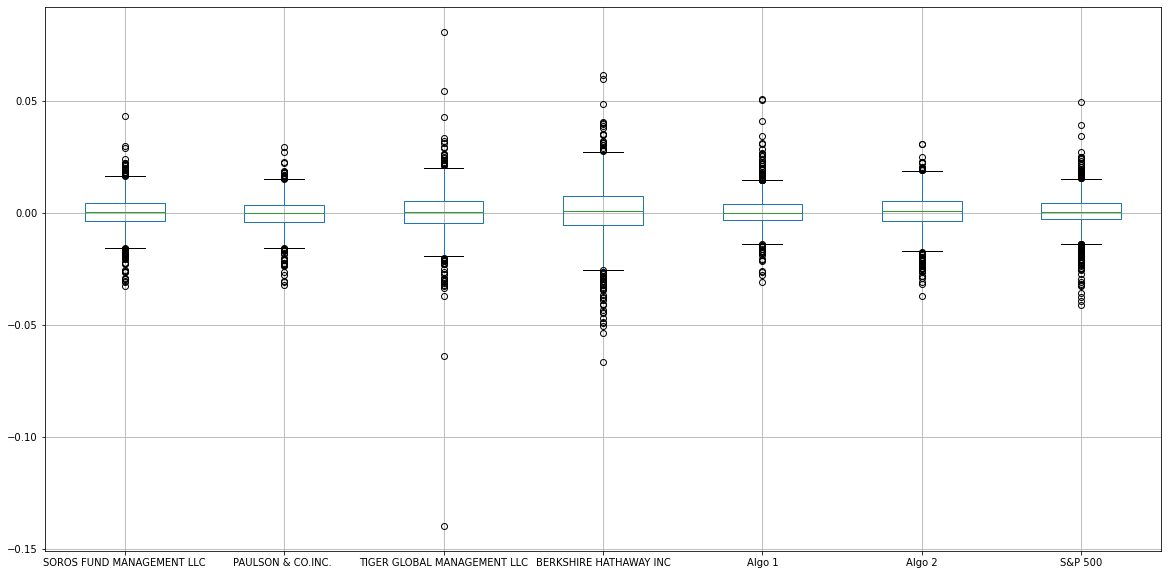

In [26]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"Daily Standard Deviation"})
df_daily_std

,Daily Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate the daily standard deviation of S&P 500
sp500_daily_std = combined_df['S&P 500'].std()
sp500_daily_std

0.008553731597758204

In [29]:
# Determine which portfolios are riskier than the S&P 500p
print("The following portfolios below are riskier than the S&P 500:")
higher_std = df_daily_std[df_daily_std["Daily Standard Deviation"] > df_daily_std.loc["S&P 500", "Daily Standard Deviation"]]
higher_std

The following portfolios below are riskier than the S&P 500:


,Daily Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [30]:
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std
df_annualized_std.rename(columns={'Daily Standard Deviation': 'Annualized Standard Deviation'})

,Annualized Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

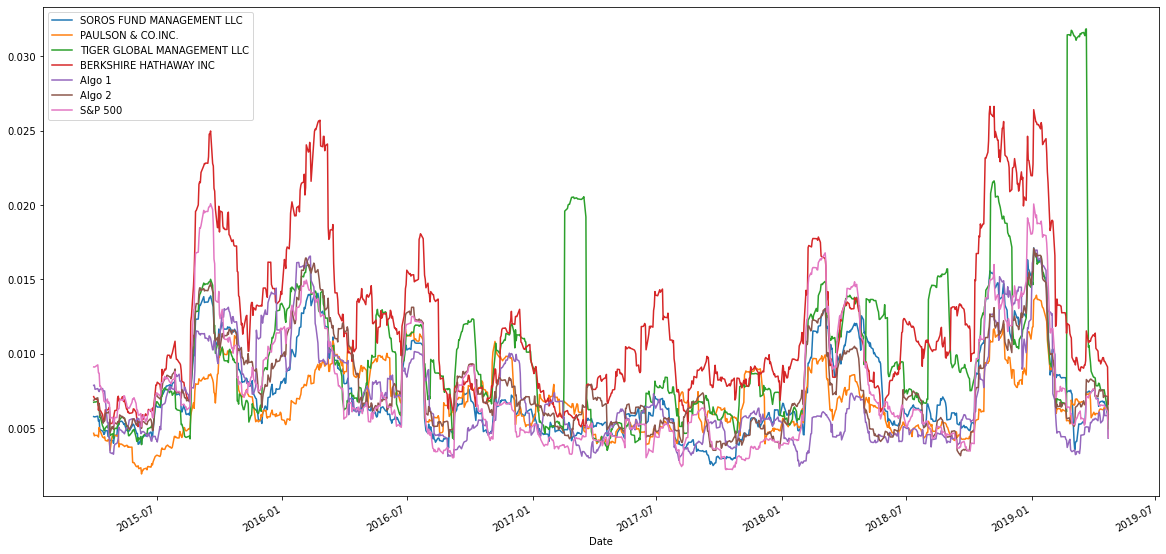

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10))


### Calculate and plot the correlation

In [32]:
# Calculate the correlation
correlation = combined_df.corr()

# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Soros Fund'}, xlabel='Date'>

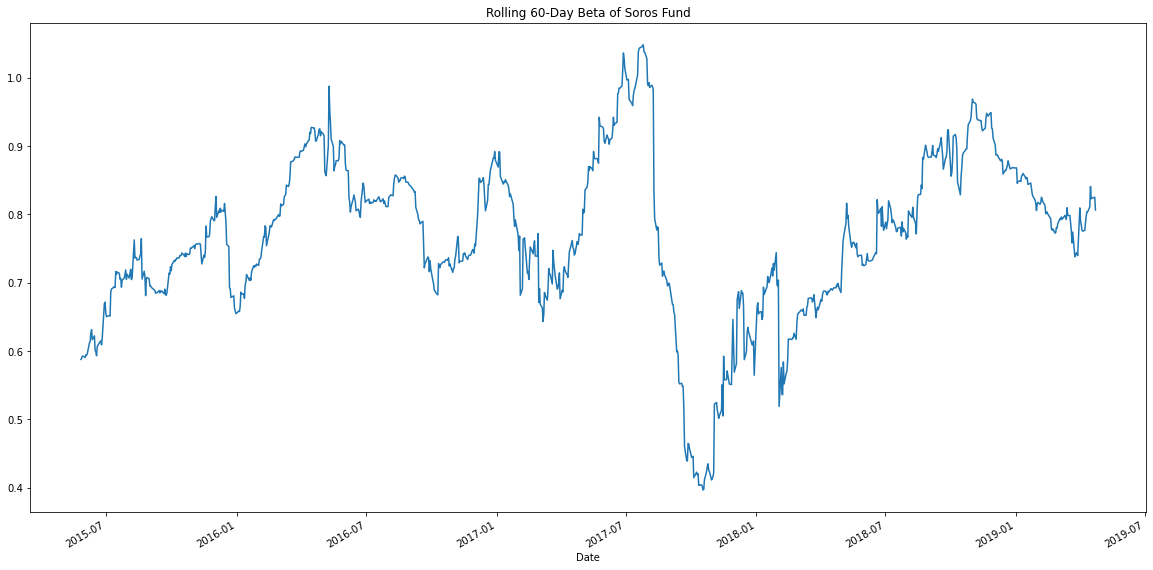

In [33]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
rolling_variance = combined_df['S&P 500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros Fund')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

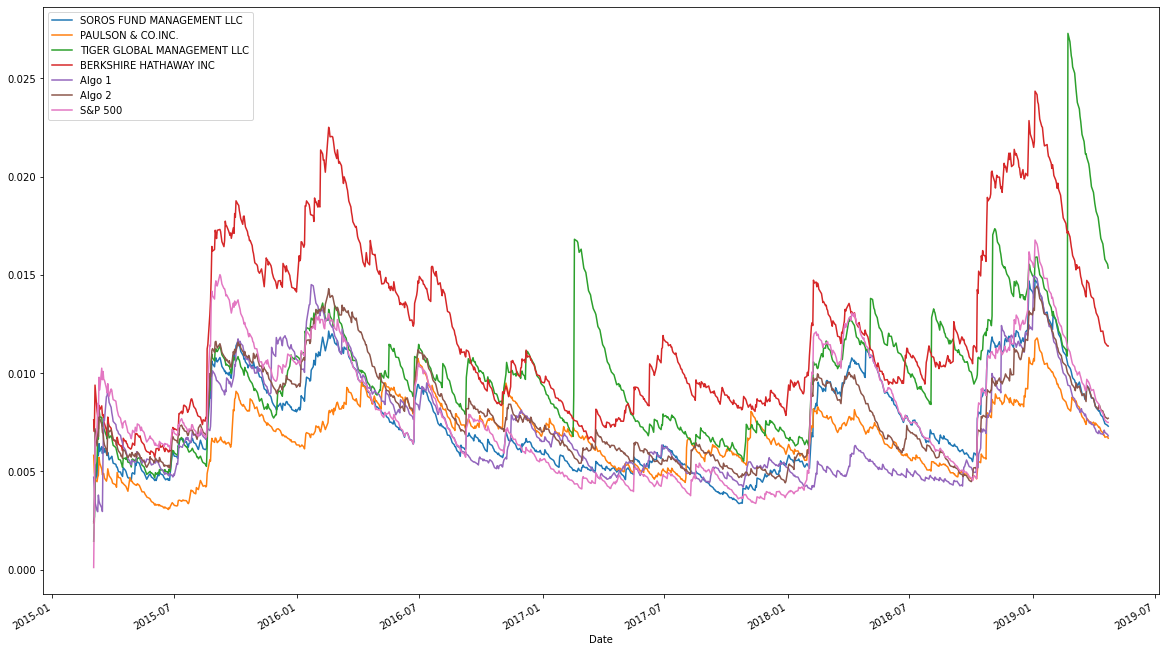

In [34]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(20,12))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

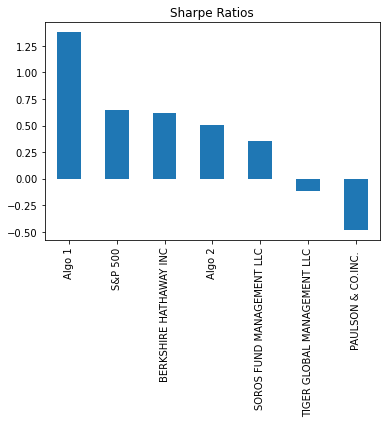

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

* Algo 1 outperformed the S&P 500 and the whales portfolios.
* Algo 2  did not outperform the S&P 500, and only outperformed Soros, Tiger, and Paulson.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Reading data from 1st stock
dxcm = Path("Resources/DXCM.csv")
dxcm_df = pd.read_csv(dxcm, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop unneeded columns
dxcm_df.drop(['Open', 'High','Low','Adj Close', 'Volume'], axis=1, inplace=True)

# Rename Column
dxcm_df = dxcm_df.rename(columns={'Close': 'dxcm'})

# Change Column to Float
dxcm_df["dxcm"] = dxcm_df["dxcm"].astype("float")

# Preview Data
dxcm_df.head()

,dxcm
Date,
2005-04-14,11.74
2005-04-15,10.25
2005-04-18,10.50
2005-04-19,10.58
2005-04-20,10.60


In [38]:
#Check nulls and check datatype
dxcm_df.isnull().sum()

dxcm    0
dtype: int64

In [39]:
dxcm_df.dtypes

dxcm    float64
dtype: object

In [40]:
# Change dataframe from closing stock prices to returns
dxcm_df_returns = dxcm_df.pct_change()
dxcm_df_returns.head()

,dxcm
Date,
2005-04-14,NaN
2005-04-15,-0.126917
2005-04-18,0.024390
2005-04-19,0.007619
2005-04-20,0.001890


In [41]:
dxcm_df_returns.isnull().sum()

dxcm    1
dtype: int64

In [42]:
dxcm_df_returns = dxcm_df_returns.dropna()

In [43]:
dxcm_df_returns.isnull().sum()

dxcm    0
dtype: int64

In [44]:
# Reading data from 2nd stock
lng = Path("Resources/LNG.csv")
lng_df = pd.read_csv(lng, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop unneeded columns
lng_df.drop(['Open', 'High','Low','Adj Close', 'Volume'], axis=1, inplace=True)

# Rename Column
lng_df = lng_df.rename(columns={'Close': 'lng'})

# Change Column to Float
lng_df["lng"] = lng_df["lng"].astype("float")

# View Data
lng_df.head()

,lng
Date,
1994-11-01,21.0
1994-11-02,16.5
1994-11-03,16.5
1994-11-04,16.5
1994-11-07,16.5


In [45]:
# Check nulls
lng_df.isnull().sum()

lng    26
dtype: int64

In [46]:
# Drop nulls
lng_df = lng_df.dropna()

In [47]:
# Check nulls
lng_df.isnull().sum()

lng    0
dtype: int64

In [48]:
#Check Data type
lng_df.dtypes

lng    float64
dtype: object

In [49]:
# Change dataframe from closing stock prices to returns
lng_df_returns = lng_df.pct_change()
lng_df_returns.head()

,lng
Date,
1994-11-01,NaN
1994-11-02,-0.214286
1994-11-03,0.000000
1994-11-04,0.000000
1994-11-07,0.000000


In [50]:
# Check nulls
lng_df_returns.isnull().sum()

lng    1
dtype: int64

In [51]:
# Drop nulls
lng_df_returns = lng_df_returns.dropna()

In [52]:
# Check nulls
lng_df_returns.isnull().sum()

lng    0
dtype: int64

In [53]:
# Reading data from 3rd stock
tdg = Path("Resources/TDG.csv")
tdg_df = pd.read_csv(tdg, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Drop unneeded columns
tdg_df.drop(['Open', 'High','Low','Adj Close', 'Volume'], axis=1, inplace=True)

# Rename Column
tdg_df = tdg_df.rename(columns={'Close': 'tdg'})

# Change Column to Float
tdg_df["tdg"] = tdg_df["tdg"].astype("float")

# Preview Data
tdg_df.head()

,tdg
Date,
2006-03-15,24.100000
2006-03-16,24.270000
2006-03-17,25.010000
2006-03-20,24.900000
2006-03-21,24.200001


In [54]:
# Check nulls
tdg_df.isnull().sum()

tdg    0
dtype: int64

In [55]:
# Check data type
tdg_df.dtypes

tdg    float64
dtype: object

In [56]:
# Change dataframe from closing stock prices to returns
tdg_df_returns = tdg_df.pct_change()
tdg_df_returns.head()

,tdg
Date,
2006-03-15,NaN
2006-03-16,0.007054
2006-03-17,0.030490
2006-03-20,-0.004398
2006-03-21,-0.028112


In [57]:
# Check nulls
tdg_df_returns.isnull().sum()

tdg    1
dtype: int64

In [58]:
# Drop nulls
tdg_df_returns = tdg_df_returns.dropna()

In [59]:
# Check nulls
tdg_df_returns.isnull().sum()

tdg    0
dtype: int64

In [60]:
# Combine all stocks in a single DataFrame
# Reorganize portfolio data by having a column per symbol
# Data was cleaned prior to getting to this step
combined_close_df = pd.concat([dxcm_df, lng_df, tdg_df], axis="columns", join="inner")
combined_close_df

,dxcm,lng,tdg
Date,,,
2006-03-15,20.799999,39.689999,24.100000
2006-03-16,20.049999,39.660000,24.270000
2006-03-17,19.280001,39.419998,25.010000
2006-03-20,18.440001,38.599998,24.900000
2006-03-21,18.490000,37.869999,24.200001
...,...,...,...
2021-12-06,524.429993,105.370003,601.619995
2021-12-07,558.400024,106.559998,603.359985
2021-12-08,564.849976,105.480003,612.570007


In [61]:
# Calculate daily returns
combined_return_df = pd.concat([dxcm_df_returns, lng_df_returns, tdg_df_returns], axis="columns", join="inner")

# Drop NAs
combined_return_df = combined_return_df.dropna()
# Display sample data
combined_return_df

,dxcm,lng,tdg
Date,,,
2006-03-16,-0.036058,-0.000756,0.007054
2006-03-17,-0.038404,-0.006051,0.030490
2006-03-20,-0.043568,-0.020802,-0.004398
2006-03-21,0.002711,-0.018912,-0.028112
2006-03-22,0.009194,0.004753,-0.001653
...,...,...,...
2021-12-06,0.009509,0.017969,0.030348
2021-12-07,0.064775,0.011293,0.002892
2021-12-08,0.011551,-0.010135,0.015265


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [62]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_df = combined_return_df .dot(weights)
portfolio_returns_df = portfolio_returns_df.rename("My Custom Portfolio")

# Display sample data
portfolio_returns_df.head()

Date
2006-03-16   -0.009920
2006-03-17   -0.004655
2006-03-20   -0.022923
2006-03-21   -0.014771
2006-03-22    0.004098
Name: My Custom Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [63]:
# Join your returns DataFrame to the original returns DataFrame
custom_port_df = pd.concat([combined_df, portfolio_returns_df], axis="columns", join="inner")
custom_port_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.001379
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.011151
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.003660
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015098
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.000633
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.007374
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.019130
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.014534


In [64]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_port_df.dropna(inplace=True)
custom_port_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.001379
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.011151
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.003660
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015098
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.000633
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.007374
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.019130
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.014534


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [65]:
# Calculate the annualized `std`
# Calculate the daily standard deviations of all portfolios
df_custom_annualized_std = pd.DataFrame(custom_port_df.std())*np.sqrt(252)
df_custom_annualized_std.rename(columns={0:'Annualized Standard Deviation'},inplace=True)
df_custom_annualized_std.head()

,Annualized Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

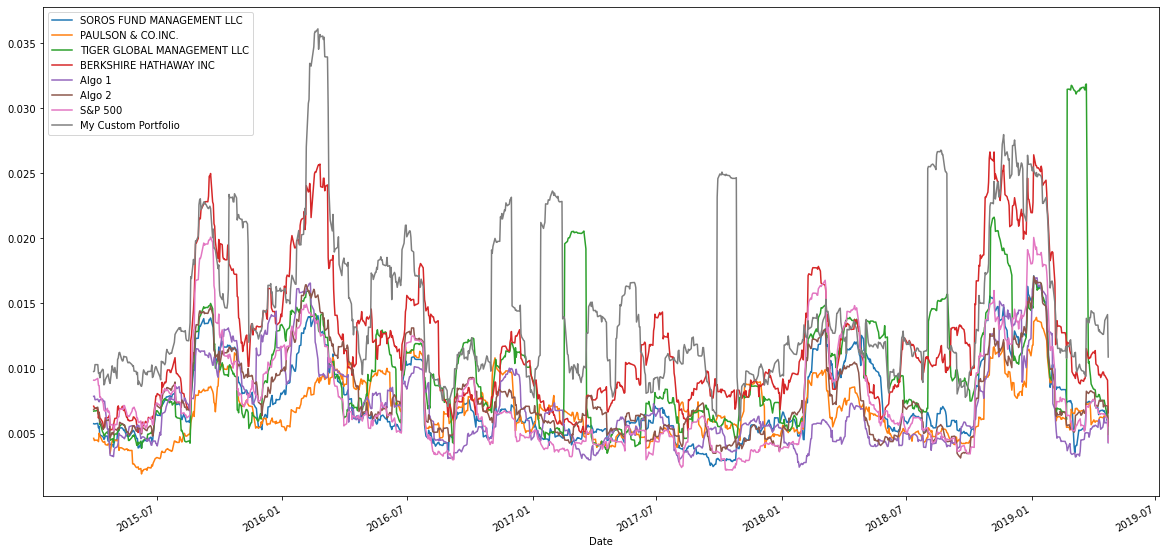

In [66]:
# Calculate rolling standard deviation
custom_port_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [67]:
# Calculate and plot the correlation
correlation = custom_port_df.corr()

# Display the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.611644
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.496010
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.389555
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.579117
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.255380
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.638252
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.610393
My Custom Portfolio,0.611644,0.496010,0.389555,0.579117,0.255380,0.638252,0.610393,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

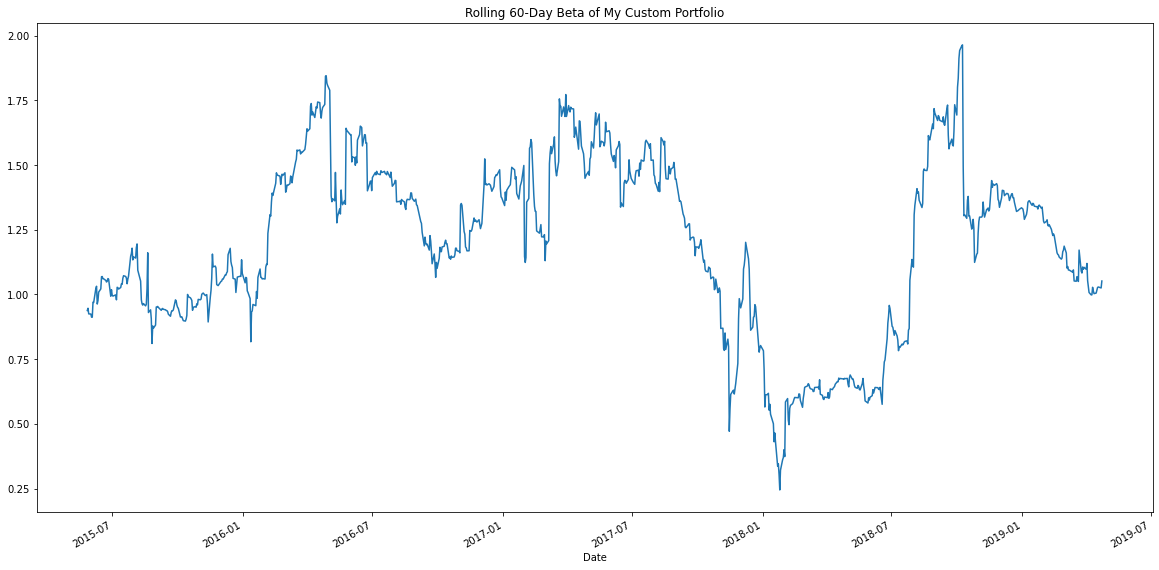

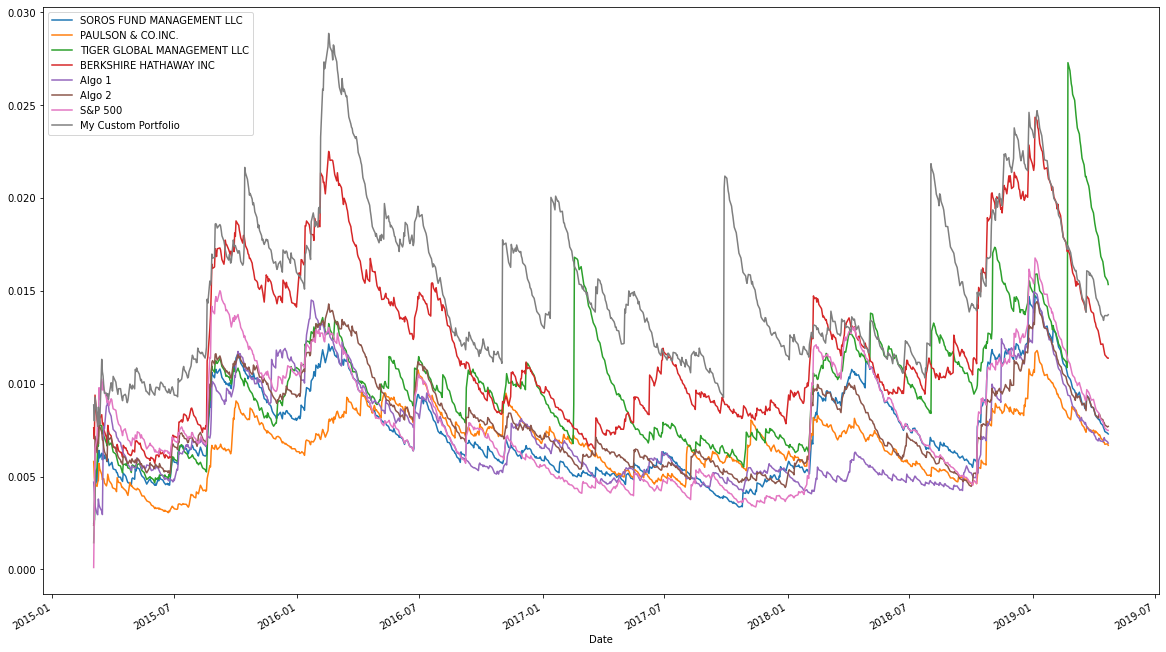

In [68]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
rolling_covariance = custom_port_df['My Custom Portfolio'].rolling(window=60).cov(custom_port_df['S&P 500'])
# Calculate variance of S&P 500
rolling_variance = custom_port_df['S&P 500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Custom Portfolio')
# Plot rolling standard deviation
custom_port_df.ewm(halflife=21).std().plot(figsize=(20,12))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [69]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (custom_port_df.mean() * 252) / (custom_port_df.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios

Algo 1                         1.378648
My Custom Portfolio            0.692033
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

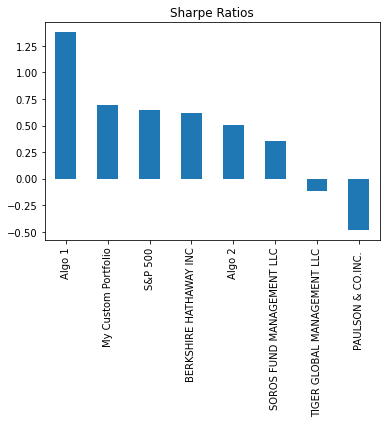

In [70]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [72]:
* Algo 1 is the only portfolio that outperformed my custom portfolio.

SyntaxError: invalid syntax (<ipython-input-72-19806fc8db90>, line 1)